In [55]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_curve,auc,roc_curve,accuracy_score,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [6]:
label_encoder=LabelEncoder()
df['Sex']=label_encoder.fit_transform(df['Sex'])
df['Sex'].value_counts()  #M=2,F=1,I=0

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

In [7]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

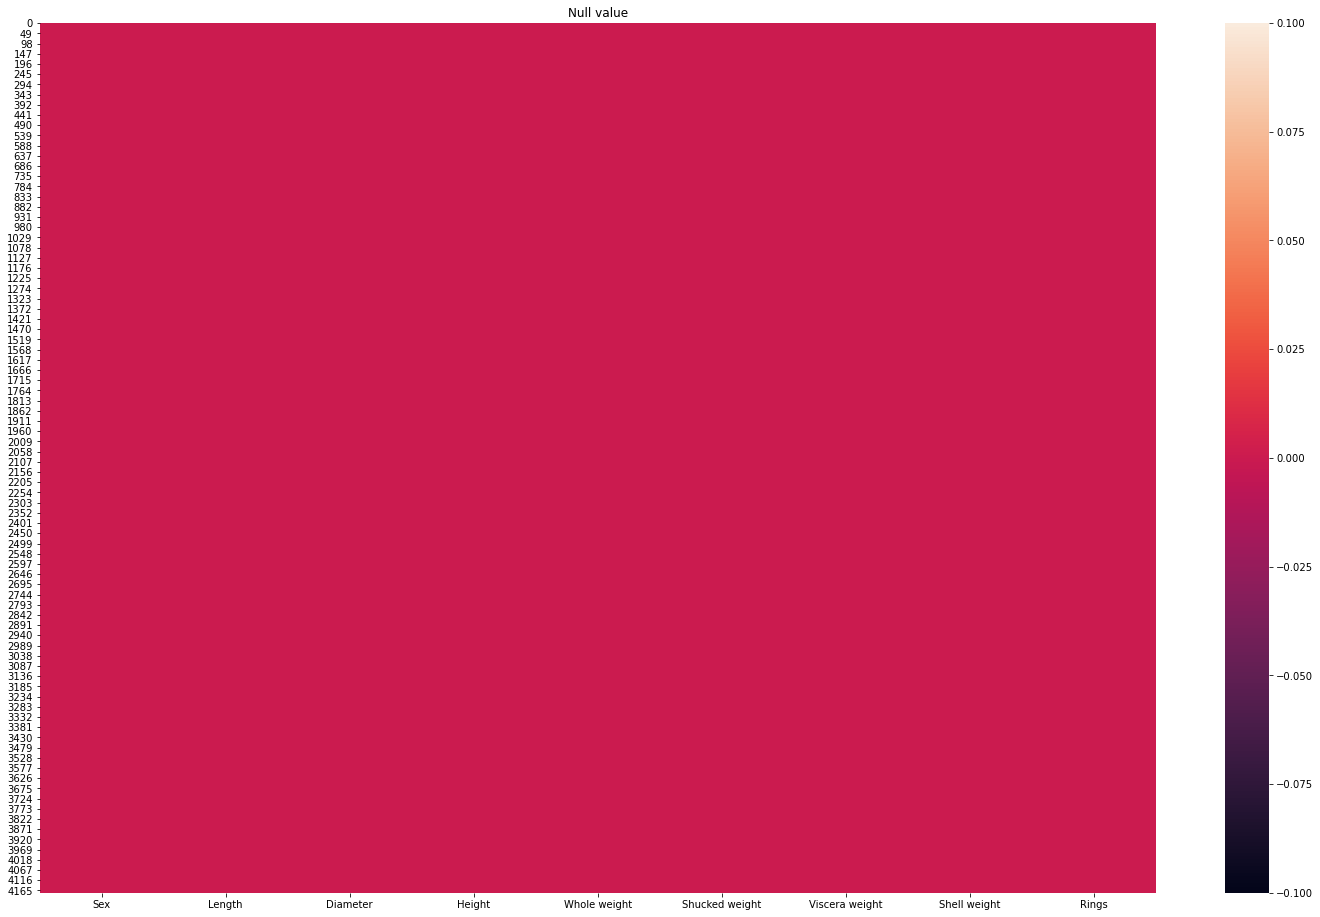

In [8]:
plt.figure(figsize=[25,16])
sns.heatmap(df.isnull())
plt.title('Null value')
plt.show()

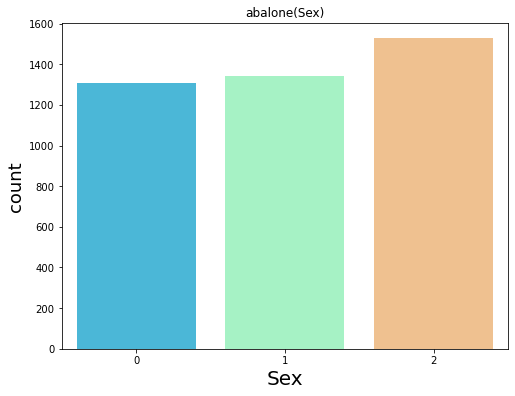

2    1528
1    1342
0    1307
Name: Sex, dtype: int64


In [9]:
count=df['Sex'].value_counts()
plt.figure(figsize=[8,6])
sns.barplot(count.index,count.values,alpha=0.8,palette='rainbow')
plt.xlabel('Sex',fontsize=20)
plt.ylabel('count',fontsize=18)
plt.title('abalone(Sex)')
plt.show()


print(df['Sex'].value_counts())

In [10]:
corr_matrix=df.corr()
corr_matrix

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


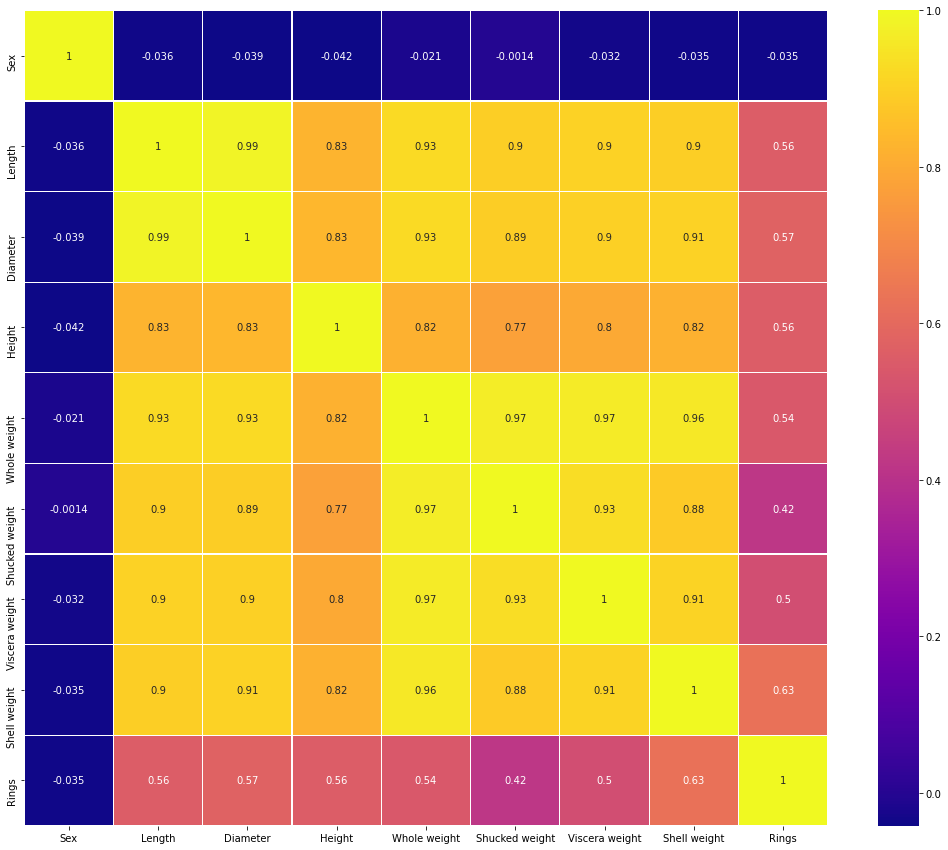

In [11]:
plt.figure(figsize=[18,15])
sns.heatmap(corr_matrix,annot=True,linewidths=0.1,cmap='plasma')
plt.show()

In [12]:
corr_matrix=df.corr()
corr_matrix['Sex'].sort_values(ascending=False)

Sex               1.000000
Shucked weight   -0.001373
Whole weight     -0.021391
Viscera weight   -0.032067
Rings            -0.034627
Shell weight     -0.034854
Length           -0.036066
Diameter         -0.038874
Height           -0.042077
Name: Sex, dtype: float64

# outlier detection and removal of outlier using IQR


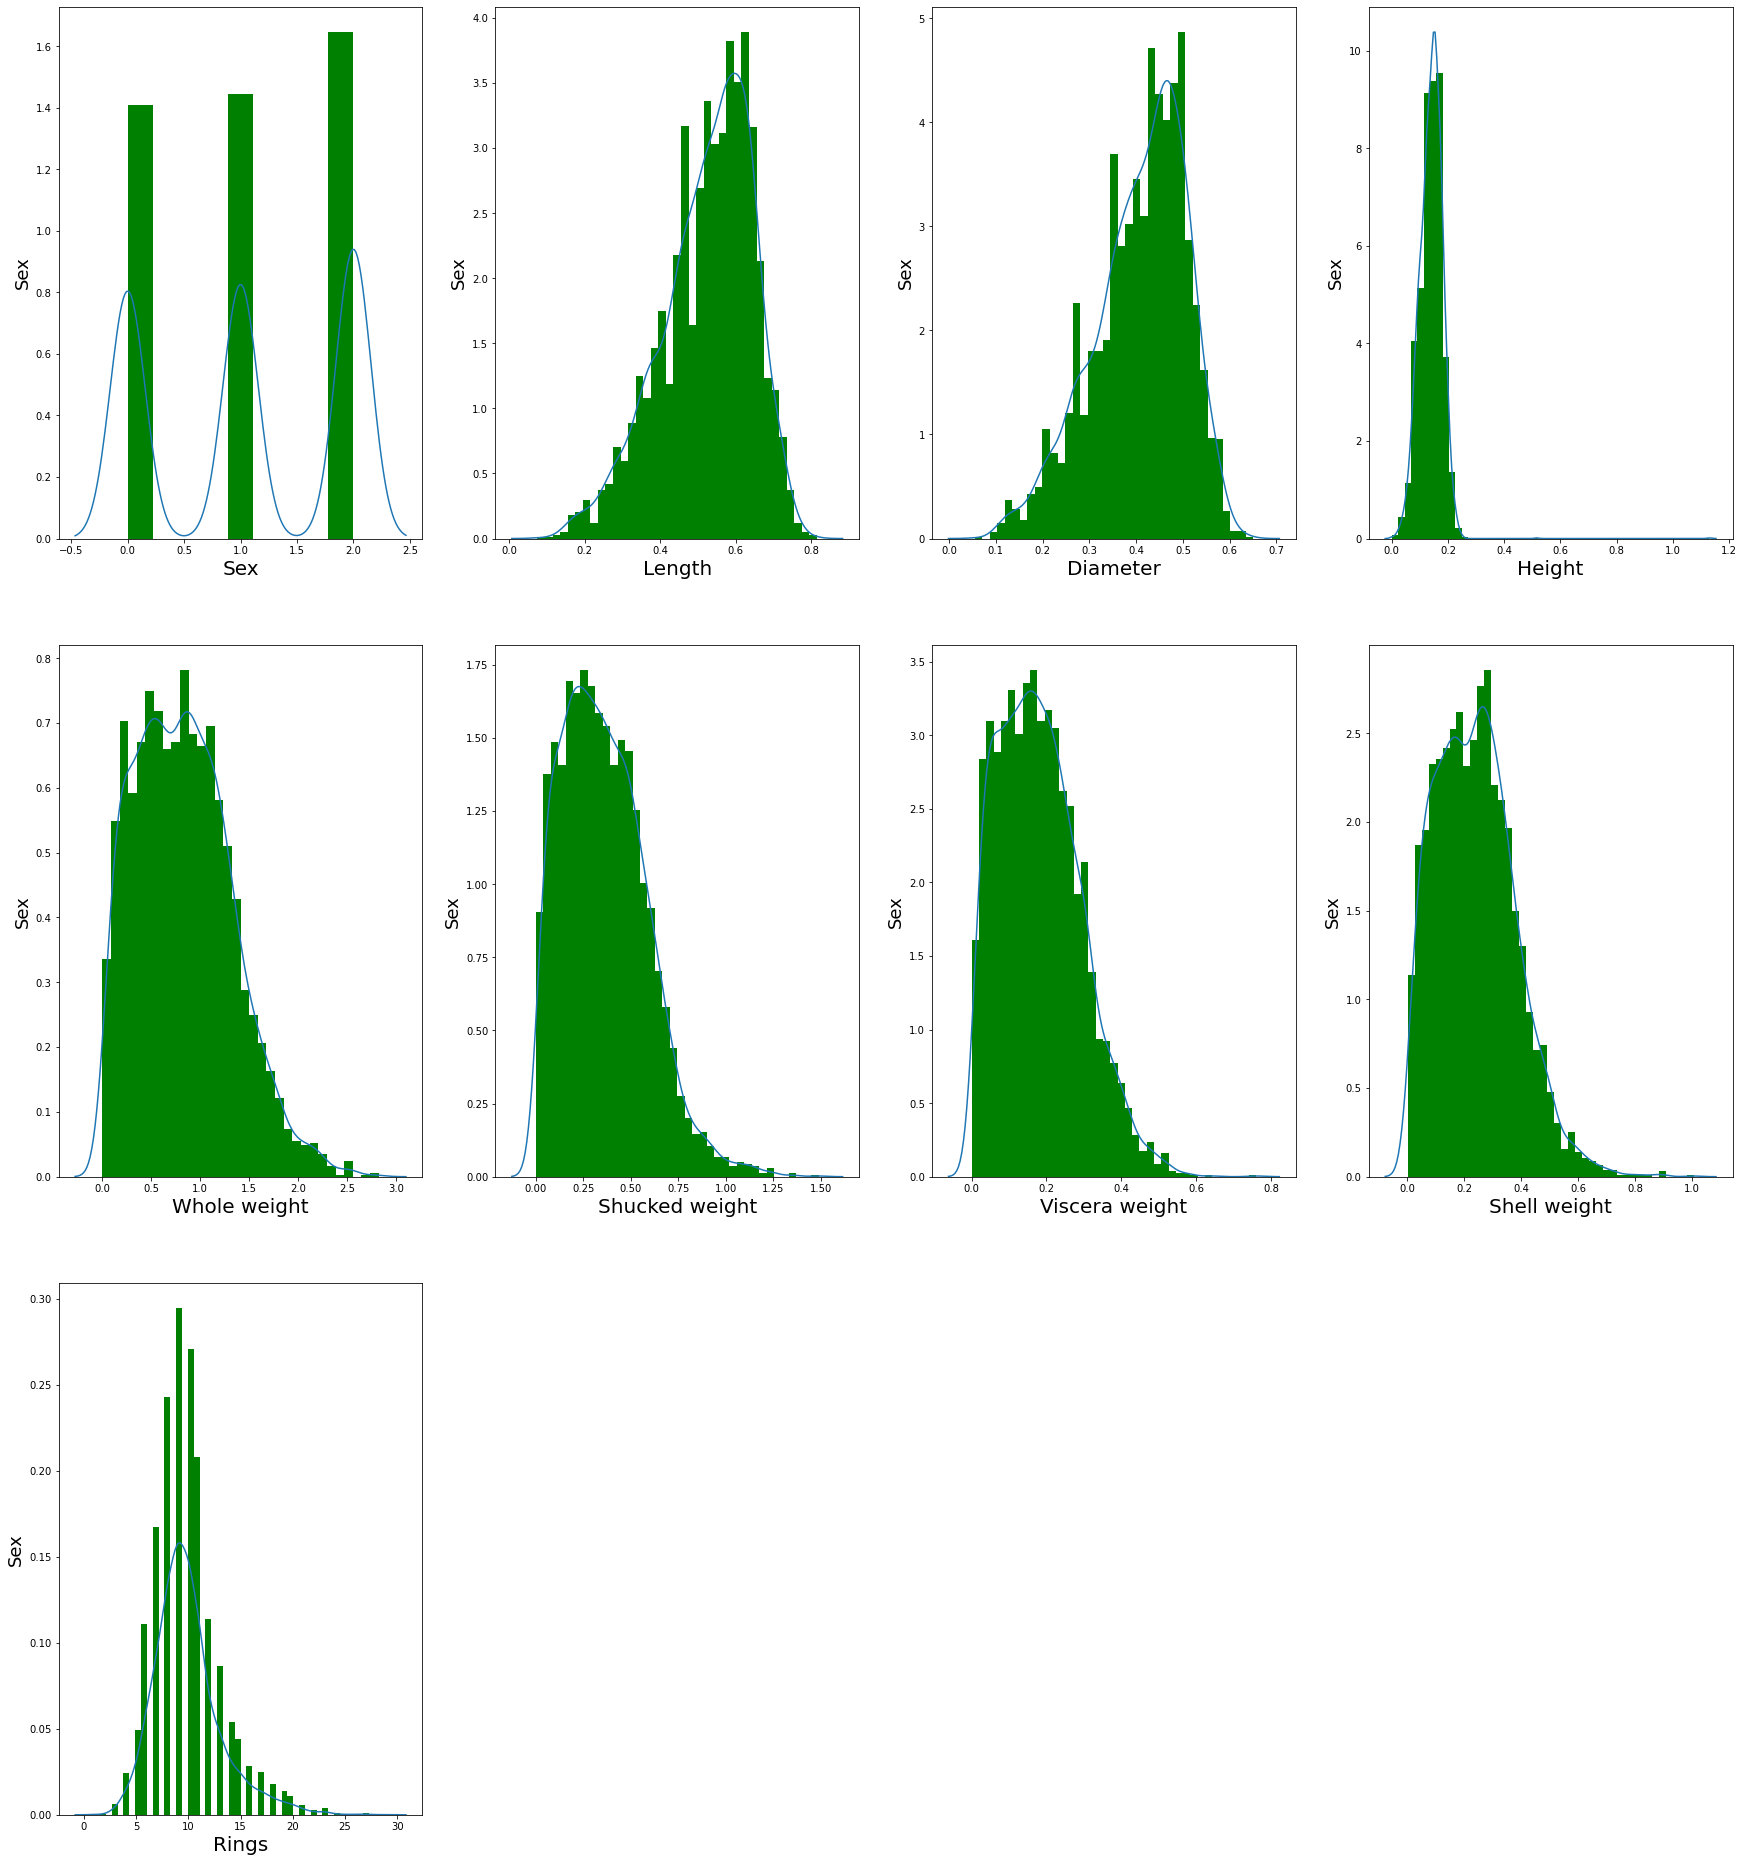

In [13]:
plt.figure(figsize=[30,45])
plotnumber=1

for column in df.columns:

    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
    
    
        sns.distplot(df[column], hist_kws={"histtype": "stepfilled", "linewidth": 4,"alpha": 1, "color": "g"})
                               
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Sex',fontsize=18)
    plotnumber+=1    
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Length'>

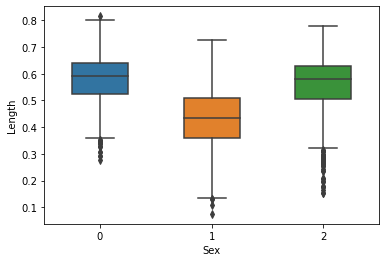

In [14]:
sns.boxplot('Sex', 'Length', data = df,width=0.5,orient="v")

<AxesSubplot:xlabel='Sex', ylabel='Diameter'>

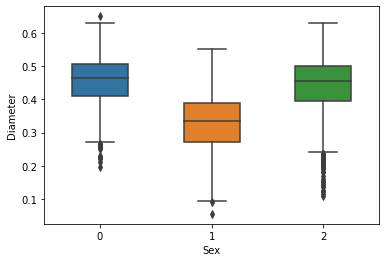

In [15]:
sns.boxplot('Sex', 'Diameter', data = df,width=0.5,orient="v")

<AxesSubplot:xlabel='Sex', ylabel='Whole weight'>

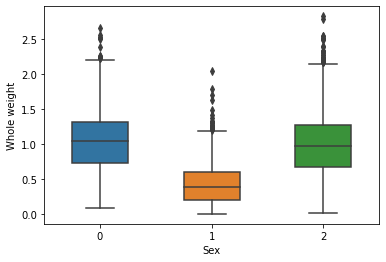

In [16]:
sns.boxplot('Sex', 'Whole weight', data = df,width=0.5,orient="v")

<AxesSubplot:xlabel='Sex', ylabel='Shucked weight'>

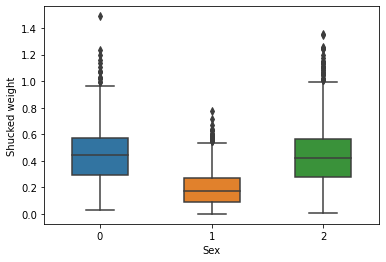

In [17]:
sns.boxplot('Sex', 'Shucked weight', data = df,width=0.5,orient="v")

<AxesSubplot:xlabel='Sex', ylabel='Shell weight'>

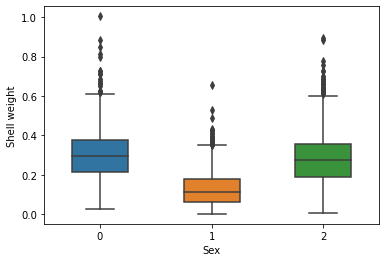

In [18]:
sns.boxplot('Sex', 'Shell weight', data = df,width=0.5,orient="v")

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

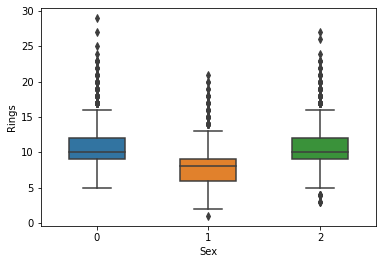

In [19]:
sns.boxplot('Sex', 'Rings', data = df,width=0.5,orient="v")

In [20]:
q1=df.quantile(0.25)

q3=df.quantile(0.75)

print(q1,"\n\n\n",q3)

iqr=q3-q1

Sex               0.0000
Length            0.4500
Diameter          0.3500
Height            0.1150
Whole weight      0.4415
Shucked weight    0.1860
Viscera weight    0.0935
Shell weight      0.1300
Rings             8.0000
Name: 0.25, dtype: float64 


 Sex                2.000
Length             0.615
Diameter           0.480
Height             0.165
Whole weight       1.153
Shucked weight     0.502
Viscera weight     0.253
Shell weight       0.329
Rings             11.000
Name: 0.75, dtype: float64


In [21]:
upper_limit=(q3+1.5*iqr)

lower_limit=(q1-1.5*iqr)

print(upper_limit,"\n\n",lower_limit)

Sex                5.00000
Length             0.86250
Diameter           0.67500
Height             0.24000
Whole weight       2.22025
Shucked weight     0.97600
Viscera weight     0.49225
Shell weight       0.62750
Rings             15.50000
dtype: float64 

 Sex              -3.00000
Length            0.20250
Diameter          0.15500
Height            0.04000
Whole weight     -0.62575
Shucked weight   -0.28800
Viscera weight   -0.14575
Shell weight     -0.16850
Rings             3.50000
dtype: float64


In [22]:
index=np.where(df['Length']< 0.20250)
index
df=df.drop(df.index[index])
df.shape
df.reset_index()

,index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4123,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4124,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4125,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4126,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [23]:
index=np.where(df['Diameter']< 0.15500)
index


df=df.drop(df.index[index])
df.shape
df.reset_index()


,index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4111,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4112,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4113,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4114,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [24]:
index=np.where(df['Height']> 0.24000)
index
df=df.drop(df.index[index])
df.shape
df.reset_index()

,index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4106,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4107,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4108,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4109,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [25]:
index=np.where(df['Height']<  0.04000)
index
df=df.drop(df.index[index])
df.shape
df.reset_index()              

,index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4103,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4104,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4105,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4106,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [26]:
index=np.where(df['Whole weight']> 2.22025)
index
df=df.drop(df.index[index])
df.shape
df.reset_index()

,index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4075,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4076,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4077,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4078,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [27]:
index=np.where(df['Shucked weight']> 0.97600)
index
df=df.drop(df.index[index])
df.shape
df.reset_index()

,index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4051,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4052,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4053,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4054,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [28]:
index=np.where(df['Viscera weight']> 0.49225)
index
df=df.drop(df.index[index])
df.shape
df.reset_index()

,index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4043,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4044,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4045,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4046,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [29]:
index=np.where(df['Shell weight']>  0.62750)
index
df=df.drop(df.index[index])
df.shape
df.reset_index()

,index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4019,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4020,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4021,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4022,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# model 

In [30]:
x=df.drop('Sex',axis=1)
y=df['Sex']
scale=StandardScaler()
x_new=scale.fit_transform(x)
x_new

array([[-0.63224492, -0.47457369, -1.23996973, ..., -0.75359153,
        -0.66512589,  1.61625821],
       [-1.58057862, -1.56243409, -1.38002975, ..., -1.27093276,
        -1.29603227, -0.94556278],
       [ 0.0451363 ,  0.12374953, -0.11948957, ..., -0.35449972,
        -0.1919461 , -0.30510753],
       ...,
       [ 0.67735877,  0.72207275,  1.8413507 , ...,  1.08420162,
         0.58091423, -0.30510753],
       [ 0.90315251,  0.83085879,  0.30069049, ...,  0.82306747,
         0.48627827,  0.01512009],
       [ 1.67085123,  1.59236107,  1.56123066, ...,  1.96121819,
         2.05565791,  0.65557534]])

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=340)

In [32]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("accuracy score:-\n",accuracy_score(y_test,predrf))
print('confusion matrix:-\n' ,confusion_matrix(y_test,predrf))
print("classification report:-\n\n",classification_report(y_test,predrf))

accuracy score:-
 0.5487077534791253
confusion matrix:-
 [[139  37 161]
 [ 32 239  43]
 [118  63 174]]
classification report:-

               precision    recall  f1-score   support

           0       0.48      0.41      0.44       337
           1       0.71      0.76      0.73       314
           2       0.46      0.49      0.47       355

    accuracy                           0.55      1006
   macro avg       0.55      0.55      0.55      1006
weighted avg       0.54      0.55      0.54      1006



In [33]:
# using GridsearchCV
param_grid = {
    'criterion':['gini','entropy'],
    'bootstrap': [True],
    'max_depth': [5,10, 15, 20],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 20, 30, 40,50,60,70,80]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [34]:
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20], 'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80]},
             verbose=2)

In [35]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 10}

In [39]:
rf_gridsearchcv=RandomForestClassifier(criterion='entropy',bootstrap=True,max_depth=5,max_features=3,min_samples_leaf=3,min_samples_split=12,n_estimators=10)
rf_gridsearchcv.fit(x_train,y_train)
predrf=rf_gridsearchcv.predict(x_test)
print("accuracy score:-\n",accuracy_score(y_test,predrf))
print('confusion matrix:-\n' ,confusion_matrix(y_test,predrf))
print("classification report:-\n\n",classification_report(y_test,predrf))

accuracy score:-
 0.532803180914513
confusion matrix:-
 [[ 70  59 208]
 [ 16 248  50]
 [ 57  80 218]]
classification report:-

               precision    recall  f1-score   support

           0       0.49      0.21      0.29       337
           1       0.64      0.79      0.71       314
           2       0.46      0.61      0.52       355

    accuracy                           0.53      1006
   macro avg       0.53      0.54      0.51      1006
weighted avg       0.53      0.53      0.50      1006



In [41]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
print("accuracy score:-\n",accuracy_score(y_test,pred_dt))
print('confusion matrix:-\n' ,confusion_matrix(y_test,pred_dt))
print("classification report:-\n\n",classification_report(y_test,pred_dt))

accuracy score:-
 0.510934393638171
confusion matrix:-
 [[155  43 139]
 [ 53 204  57]
 [125  75 155]]
classification report:-

               precision    recall  f1-score   support

           0       0.47      0.46      0.46       337
           1       0.63      0.65      0.64       314
           2       0.44      0.44      0.44       355

    accuracy                           0.51      1006
   macro avg       0.51      0.52      0.51      1006
weighted avg       0.51      0.51      0.51      1006



In [42]:
param_grid={
    
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[5,10,15,20],
     'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'max_leaf_nodes':[2,4,6,8,10]
        
}


grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3)

In [43]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20], 'max_features': [2, 3],
                         'max_leaf_nodes': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'splitter': ['best', 'random']})

In [44]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 3,
 'max_leaf_nodes': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'splitter': 'best'}

In [45]:
dt_gridsearchcv=DecisionTreeClassifier(criterion='gini',max_depth=10,max_features=3,max_leaf_nodes=8,min_samples_leaf=3,min_samples_split=10,splitter='best')
dt_gridsearchcv.fit(x_train,y_train)
pred_dt=dt_gridsearchcv.predict(x_test)
print("accuracy score:-\n",accuracy_score(y_test,pred_dt))
print('confusion matrix:-\n' ,confusion_matrix(y_test,pred_dt))
print("classification report:-\n\n",classification_report(y_test,pred_dt))

accuracy score:-
 0.5119284294234593
confusion matrix:-
 [[ 25  48 264]
 [ 11 256  47]
 [ 40  81 234]]
classification report:-

               precision    recall  f1-score   support

           0       0.33      0.07      0.12       337
           1       0.66      0.82      0.73       314
           2       0.43      0.66      0.52       355

    accuracy                           0.51      1006
   macro avg       0.47      0.52      0.46      1006
weighted avg       0.47      0.51      0.45      1006



In [46]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("accuracy score:-\n",accuracy_score(y_test,predknn))
print('confusion matrix:-\n' ,confusion_matrix(y_test,predknn))
print("classification report:-\n\n",classification_report(y_test,predknn))


accuracy score:-
 0.532803180914513
confusion matrix:-
 [[162  42 133]
 [ 50 233  31]
 [150  64 141]]
classification report:-

               precision    recall  f1-score   support

           0       0.45      0.48      0.46       337
           1       0.69      0.74      0.71       314
           2       0.46      0.40      0.43       355

    accuracy                           0.53      1006
   macro avg       0.53      0.54      0.53      1006
weighted avg       0.53      0.53      0.53      1006



In [47]:
param_grid={ 
    'n_neighbors':[3,5,7,9,11],
    'algorithm':['auto','ball_tree','kd_tree','brute'],
    'weights':['uniform','distance'],
    'leaf_size':[10,20,30,40,50],
    
}
grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, 
                          cv = 3)

In [48]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [49]:
grid_search.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 9, 'weights': 'uniform'}

In [50]:
knn_gridsearchcv=KNeighborsClassifier(algorithm='auto',leaf_size=10,n_neighbors=9,weights='uniform')
knn_gridsearchcv.fit(x_train,y_train)
predknn=knn_gridsearchcv.predict(x_test)
print("accuracy score:-\n",accuracy_score(y_test,predknn))
print('confusion matrix:-\n' ,confusion_matrix(y_test,predknn))
print("classification report:-\n\n",classification_report(y_test,predknn))

accuracy score:-
 0.547713717693837
confusion matrix:-
 [[160  37 140]
 [ 36 237  41]
 [135  66 154]]
classification report:-

               precision    recall  f1-score   support

           0       0.48      0.47      0.48       337
           1       0.70      0.75      0.72       314
           2       0.46      0.43      0.45       355

    accuracy                           0.55      1006
   macro avg       0.55      0.55      0.55      1006
weighted avg       0.54      0.55      0.54      1006



In [52]:
svm=SVC()   
svm.fit(x_train,y_train)
predsvm=svm.predict(x_test)
print("accuracy score:-\n",accuracy_score(y_test,predsvm))
print('confusion matrix:-\n' ,confusion_matrix(y_test,predsvm))
print('classification report:-\n\n',classification_report(y_test,predsvm))

accuracy score:-
 0.5357852882703777
confusion matrix:-
 [[ 38  45 254]
 [  9 249  56]
 [ 23  80 252]]
classification report:-

               precision    recall  f1-score   support

           0       0.54      0.11      0.19       337
           1       0.67      0.79      0.72       314
           2       0.45      0.71      0.55       355

    accuracy                           0.54      1006
   macro avg       0.55      0.54      0.49      1006
weighted avg       0.55      0.54      0.48      1006



In [53]:
param_grid = {'C':[1,10,100],'gamma':[1,0.1,0.001], 'kernel':['linear','rbf']}

grid_search = GridSearchCV(estimator = svm, param_grid = param_grid, 
                          cv = 3)

In [54]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.001],
                         'kernel': ['linear', 'rbf']})

In [56]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [57]:
svm_gridsearchcv=SVC(C=10,gamma=0.1,kernel='rbf')
svm_gridsearchcv.fit(x_train,y_train)
predsvm=svm_gridsearchcv.predict(x_test)
print("accuracy score:-\n",accuracy_score(y_test,predsvm))
print('confusion matrix:-\n' ,confusion_matrix(y_test,predsvm))
print("classification report:-\n\n",classification_report(y_test,predsvm))

accuracy score:-
 0.5506958250497018
confusion matrix:-
 [[ 66  44 227]
 [ 14 248  52]
 [ 41  74 240]]
classification report:-

               precision    recall  f1-score   support

           0       0.55      0.20      0.29       337
           1       0.68      0.79      0.73       314
           2       0.46      0.68      0.55       355

    accuracy                           0.55      1006
   macro avg       0.56      0.55      0.52      1006
weighted avg       0.56      0.55      0.52      1006



In [59]:
logistic_regression=LogisticRegression()
logistic_regression.fit(x_train,y_train)
predlor=logistic_regression.predict(x_test)
print("accuracy score:-\n",accuracy_score(y_test,predlor))
print('confusion matrix:-\n' ,confusion_matrix(y_test,predlor))
print('classification report:-\n\n',classification_report(y_test,predlor))

accuracy score:-
 0.5546719681908548
confusion matrix:-
 [[101  53 183]
 [ 13 259  42]
 [ 74  83 198]]
classification report:-

               precision    recall  f1-score   support

           0       0.54      0.30      0.38       337
           1       0.66      0.82      0.73       314
           2       0.47      0.56      0.51       355

    accuracy                           0.55      1006
   macro avg       0.55      0.56      0.54      1006
weighted avg       0.55      0.55      0.54      1006



# save the model

In [60]:
import pickle
filename='abalone.pkl'
model=[rf,dt,knn,svm]
pickle.dump(model,open(filename,'wb'))
